<a href="https://colab.research.google.com/github/MatSpad/Advanced-Coding-for-Data-Analytics-Project-2024/blob/main/ACfDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Coding for Data Analytics Project
30/04/24
### Group X:
Federico De Marinis (267511)

Eleonora Di Mario (275551)

Matteo Spadaccia (277141)

## Introduction
TODO: Intro to the topic and aims of the project

## Part 0 - Preliminary code
In this section, the contextual basis for the analysis is set.

### 0.1 - Importing libraries and functions
Some libraries and functions are imported to ease the specified following tasks.

In [27]:
# [Code: 1]

# Importing libraries:          > Useful for:
import os                       # managing directories
import shutil                   # deleting directories
import time                     # checking code run times
from tqdm.auto import tqdm      # generating fancy progress bars
import gzip                     # decompressing and reading .gz files
import networkx as nx           # generating and analyzing graph objects
import pandas as pd             # managing dataframes
import numpy as np              # managing arrays
import pickle                   # storing objects (e.g., NetworkX graphs) as binary files
import matplotlib.pyplot as plt # managing image-format visual representations
import matplotlib.image as mpimg# reading image-format files

# Importing functions:          > Useful for:
def section(x:str):             # clearly depict sections of output (TO BE STORED SEPARATELY)
  if x.lower() == 'done':
    print('_'*74+" DONE!\n\n")
  elif x.lower() == 'end':
    print('_'*80+"\n\n")
  else:
    print(x+' '+'_'*(79-len(x)))

def mdgJaccard(G, n1, n2):      # calculating a Jaccard-styled similarity index for nodes in a NetworkX multiDiGraph (TO BE DESCRIBED AND STORED SEPARATELY)
  setIn1 = {(u, k) for u,v,k in G.in_edges(nbunch=[n1], keys=True)}
  setOut1 = {(v, k) for u,v,k in G.out_edges(nbunch=[n1], keys=True)}
  setIn2 = {(u, k) for u,v,k in G.in_edges(nbunch=[n2], keys=True)}
  setOut2 = {(v, k) for u,v,k in G.out_edges(nbunch=[n2], keys=True)}
  return (len(setIn1 & setIn2)+len(setOut1 & setOut2))/(len(setIn1 | setIn2)+len(setOut1 | setOut2))

print("Libraries and functions imported!")

Libraries and functions imported!


### 0.2 - Sript settings
Some variables are settable to customize the specified script's behaviors.

In [65]:
# [Code: 2]

# Script settings:              > Usage:
reloadRepository = False        # if true, the GitHub repository is loaded again even if already cloned
rebuildGraph = True             # if true, the graph is built again from input data even if already available as saved object
loadDisconnectedNodes = True    # if true, when eventually rebuilding the graph, all the nodes are considered even if not partecipating in any edge
overwriteSavings = True         # if true, saved files are overwrited by newly computed outputs
generateImages = True          # if true, images are generated during code execution (computationally expensive)

# Checks:
repositoryLoaded = os.getcwd()[-17:] == 'cloned-repository' # checks if the current working directory is the cloned repository itself
if not rebuildGraph and os.path.isfile('Outputs/Graph.pickle'):
  rebuildGraph = True
  print("No previously saved graph object found, the network will be constructed again from data.")

print("Script set!")

Script set!


### 0.3 - Colab-GitHub interaction initialization
Colab's working directory is set by loading the project's GitHub repository. If the latter has already been cloned and the reloadRepository variable [Code: 1 - Script settings] is switched to False, the working directory would not be updated.

In [29]:
# [Code: 3]

# Colab-GitHub interaction initialization
if repositoryLoaded and reloadRepository:                   # if the repository is already loaded and to be updated, it is discarded
  os.chdir('..')
  shutil.rmtree('cloned-repository')
  repositoryLoaded = False
if not repositoryLoaded:                                    # if the repository is to be loaded (or updated), it is cloned from GitHub
  section("Loading repository:")
  ! git clone -l -s https://github.com/MatSpad/Advanced-Coding-for-Data-Analytics-Project-2024.git cloned-repository
  %cd cloned-repository
  section('done')
else:
  print("Using previously loaded repository!")

Using previously loaded repository!


## Part 1 - Constructing the biomedical knowledge graph
In this section, the nodes and edges data are imported and saved as a NetworkX directed multi-graph, on which specific analysis could be run afterwards.

### 1.1 - Building Dataframes from files
The information contained in both the nodelist and edgelist files are loaded as separate Pandas dataframes.

In [30]:
# [Code: 4]

# Bulding nodes dataframe from the related file
section("Loading nodes' info as dataframe:")
nodesDF = pd.read_csv('Inputs/hetionet-v1.0-nodes.tsv',sep='\t')
display(nodesDF)
section('done')

# Bulding edges dataframe from the related file
section("Loading edges list as dataframe:")
edgesDF = pd.read_csv('Inputs/hetionet-v1.0-edges.sif.gz', compression='gzip', sep='\t')
display(edgesDF)
section('done')

Loading nodes' info as dataframe: ______________________________________________


,id,name,kind
0,Anatomy::UBERON:0000002,uterine cervix,Anatomy
1,Anatomy::UBERON:0000004,nose,Anatomy
2,Anatomy::UBERON:0000006,islet of Langerhans,Anatomy
3,Anatomy::UBERON:0000007,pituitary gland,Anatomy
4,Anatomy::UBERON:0000010,peripheral nervous system,Anatomy
...,...,...,...
47026,Symptom::D064250,Hypertriglyceridemic Waist,Symptom
47027,Symptom::D065634,Cerebrospinal Fluid Leak,Symptom
47028,Symptom::D065635,Benign Paroxysmal Positional Vertigo,Symptom
47029,Symptom::D065906,Hyperlactatemia,Symptom


__________________________________________________________________________ DONE!


Loading edges list as dataframe: _______________________________________________


,source,metaedge,target
0,Gene::9021,GpBP,Biological Process::GO:0071357
1,Gene::51676,GpBP,Biological Process::GO:0098780
2,Gene::19,GpBP,Biological Process::GO:0055088
3,Gene::3176,GpBP,Biological Process::GO:0010243
4,Gene::3039,GpBP,Biological Process::GO:0006898
...,...,...,...
2250192,Anatomy::UBERON:0000057,AeG,Gene::65009
2250193,Anatomy::UBERON:0000474,AeG,Gene::80279
2250194,Anatomy::UBERON:0002048,AeG,Gene::1211
2250195,Anatomy::UBERON:0002048,AeG,Gene::8843


__________________________________________________________________________ DONE!




### 1.2 - Preliminary analysis
Some preliminary checks are enacted on the dataframes in order to determine which type of graph could better store the given data (i.e., a directed multigraph).

In [31]:
# [Code: 5]

# Nodes DF preliminary analysis:                                                                                                                  > Finding:
section("Nodes dataframe info:")
nodesFileLen = len(nodesDF.index)
uniqueNodeIDs = len(pd.unique(nodesDF['id']))
nodesDF.info()
print("\nNodes in DF:", nodesFileLen, "\n(of which", uniqueNodeIDs, "different by ID)")                                                           # the nodes data present 47031 different nodes
section('end')

# Edges DF preliminary analysis:                                                                                                                  > Finding:
section("Nodes dataframe info:")
edgesFileLen = len(edgesDF.index)
source_targetCouples = len(edgesDF.loc[:, ['source', 'target']].drop_duplicates())
uniqueEdges = len(edgesDF.drop_duplicates())
edgesDF.info()
print("\nEdges in DF:", edgesFileLen, "\n(of which", uniqueEdges, "different, but just", source_targetCouples, "with different source-target pair)")  # the edges data present 2250197 edges, some with equal source-target pair but different link type
section('end')

Nodes dataframe info: __________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47031 entries, 0 to 47030
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      47031 non-null  object
 1   name    47031 non-null  object
 2   kind    47031 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB

Nodes in DF: 47031 
(of which 47031 different by ID)
________________________________________________________________________________


Nodes dataframe info: __________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250197 entries, 0 to 2250196
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   source    object
 1   metaedge  object
 2   target    object
dtypes: object(3)
memory usage: 51.5+ MB

Edges in DF: 2250197 
(of which 2250197 different, but just 2110272 with different source-target pair)
______

### 1.3 - Constructing the MultiDiGraph
A NetworkX directed multi-graph containing all the nodes' and edges' information is built - and eventually saved overwriting the previous binary file version - or extracted as object from a previously saved file.

In [32]:
# [Code: 6]

if rebuildGraph:

  # Constructing the MultiDiGRaph by reading the edges file directly (with progress bar)
  '''
  start = time.time()

  section("Loading the graph blending both nodes' and edges' data:")
  G = nx.MultiDiGraph()
  with gzip.open('Inputs/hetionet-v1.0-edges.sif.gz','r') as edgesFile:
    edgesFile.readline()
    for i in tqdm(range(edgesFileLen)):
      lineElements = str(edgesFile.readline())[2:-5].split('\\t')
      G.add_edge(lineElements[0], lineElements[2], edgeType=lineElements[1])
  edgesNum = G.number_of_edges()
  nodesNum = G.number_of_nodes()
  print(edgesNum, nodesNum)
  section("Done")

  end = time.time()
  print(end - start)  # progress-bar-enriched graph building is slightly slower than plain one
  '''

  # Constructing the MultiDiGRaph by reading both the dataframes
  G = nx.from_pandas_edgelist(edgesDF, 'source', 'target', edge_attr='metaedge', create_using=nx.MultiDiGraph())
  edgesNum = G.number_of_edges()
  connectedNodesNum = G.number_of_nodes()

  # Eventually adding disconnected nodes too
  if loadDisconnectedNodes:
    G.add_nodes_from(nodesDF['id'])
    consideredNodesDF = nodesDF
  else:
    consideredNodesDF = nodesDF[nodesDF['id'].isin(G.nodes())]
  nodesNum = G.number_of_nodes()

  # Setting all nodes' attributes
  nx.set_node_attributes(G, consideredNodesDF.set_index('id').to_dict('index'), 'attributes')

  # Saving the graph object to file
  if overwriteSavings:
    pickle.dump(G, open('Outputs/Graph.pickle', 'wb'))
    print("MultiDiGraph built and saved!")
  else:
    print("MultiDiGraph built!")

else:
  # Loading the graph object from file
  G = pickle.load(open('Outputs/Graph.pickle', 'rb'))
  print("MultiDiGraph loaded from previously saved file!")

# Displaying the loaded graph's info (TODO: change visualizations using Gephi)
if not rebuildGraph:
  plt.imshow(mpimg.imread('Outputs/Graph.png'))
  plt.show()
print("Number of edges:", edgesNum, "\nNumber of nodes:", nodesNum)
if loadDisconnectedNodes or not rebuildGraph:
  print("(of which", connectedNodesNum, "connected)")

MultiDiGraph built and saved!
Number of edges: 2250197 
Number of nodes: 47031
(of which 45158 connected)


## Part 2 – Analyzing the biomedical knowledge graph:
In this section, TODO...

### 2.1 - Computing some basic indicators
To gain a general understanding of the graph's structure and size, the following metrics are computed:

1) total number of entities for each unique kind;

2) total number of each unique edge type;

3) average in-degree and out-degree for each type of node.

In [33]:
# [Code: 7]

# (1) Counting the unique IDs for each kind of node
section("Listing the total number of entities for each unique kind:")
entitiesPerKindDF = consideredNodesDF.groupby('kind')['id'].count().reset_index(name='total_nodes')
display(entitiesPerKindDF)
section('done')

# (2) Counting the occurrences of each unique edge type
section("Listing the total number of each unique edge type:")
edgesPerTypeDF = edgesDF.groupby('metaedge').size().reset_index(name='total_edges')
display(edgesPerTypeDF)
section('done')


# (3) Calculate in-degree and out-degree for each node type
section("Computing the average in-degree and out-degree of each node type:")
inDegreesDF = pd.DataFrame(G.in_degree(), columns=['id', 'in_degree'])
outDegreesDF = pd.DataFrame(G.out_degree(), columns=['id', 'out_degree'])
degreeKindDF = consideredNodesDF[['id', 'kind', 'name']].merge(inDegreesDF, on='id').merge(outDegreesDF, on='id') # merge the information of degrees with the nodesDF to associate each node with its type
averageDegreesPerKind = degreeKindDF.groupby('kind').agg(                                       # group by the node type (kind) and calculate the average in-degree and out-degree
    averageInDegree=('in_degree', 'mean'),
    averageOutDegree=('out_degree', 'mean')
).reset_index()
display(averageDegreesPerKind)
section('done')

Listing the total number of entities for each unique kind: _____________________


,kind,total_nodes
0,Anatomy,402
1,Biological Process,11381
2,Cellular Component,1391
3,Compound,1552
4,Disease,137
5,Gene,20945
6,Molecular Function,2884
7,Pathway,1822
8,Pharmacologic Class,345
9,Side Effect,5734


__________________________________________________________________________ DONE!


Listing the total number of each unique edge type: _____________________________


,metaedge,total_edges
0,AdG,102240
1,AeG,526407
2,AuG,97848
3,CbG,11571
4,CcSE,138944
5,CdG,21102
6,CpD,390
7,CrC,6486
8,CtD,755
9,CuG,18756


__________________________________________________________________________ DONE!


Computing the average in-degree and out-degree of each node type: ______________


,kind,averageInDegree,averageOutDegree
0,Anatomy,8.960199,1807.201493
1,Biological Process,49.161234,0.000000
2,Cellular Component,52.887132,0.000000
3,Compound,4.842139,127.579897
4,Disease,12.321168,258.970803
5,Gene,61.132824,61.551206
6,Molecular Function,33.710818,0.000000
7,Pathway,46.307355,0.000000
8,Pharmacologic Class,0.000000,2.982609
9,Side Effect,24.231601,0.000000


__________________________________________________________________________ DONE!




### 2.2 - Analyzing diseases-symptoms correlation
1) For each disease-type node the in-degree and out-degree is computed and the most connected diseases are shown.

2) The disease-symptom sub-graph is extracted and the average
number of symptoms related to a disease is computed.

In [34]:
# [Code: 8]

# (1) Analyzing the degrees of each disease-type node
diseasesDegrees = degreeKindDF[degreeKindDF['kind']=='Disease'].drop(columns='kind')
section("Disease-type nodes with higest in-degrees:")
display(diseasesDegrees.sort_values(by='in_degree', ascending=False).drop(columns='out_degree').head(5))
section('end')
section("Disease-type nodes with higest out-degrees:")
display(diseasesDegrees.sort_values(by='out_degree', ascending=False).drop(columns='in_degree').head(5))
section('end')

# (2) Extracting the disease-symptom sub-graph and computing the symptom/disease ratio
section("Disease-symtpom sub-graph info:")
diseasesSymptomsSubG = G.subgraph(consideredNodesDF[consideredNodesDF['kind'].isin(['Disease', 'Symptom'])]['id'])
edgesTypeDF = edgesDF.merge(consideredNodesDF.rename(columns={'id': 'source'}), on='source').merge(consideredNodesDF.rename(columns={'id': 'target'}), on='target')
edgesTypeDF = edgesTypeDF.rename(columns={'kind_x':'kind_source', 'name_x':'name_source','kind_y':'kind_target','name_y':'name_target'})
edgesDiseasesSymptomsSubDF = edgesTypeDF[edgesTypeDF['kind_source'].isin(['Disease', 'Symptom']) & edgesTypeDF['kind_target'].isin(['Disease', 'Symptom'])]
print("Type of edges:", edgesDiseasesSymptomsSubDF['metaedge'].unique())  # Asserting disease-to-symptom as only direction for disease-symptom edges
symptomDiseaseRatio = len(edgesDiseasesSymptomsSubDF[edgesDiseasesSymptomsSubDF['metaedge']=='DpS'])/len(consideredNodesDF[consideredNodesDF['kind']=='Disease'])
print("Average number of symptoms related to each disease:", symptomDiseaseRatio)
section('end')

Disease-type nodes with higest in-degrees: _____________________________________


,id,name,in_degree
14739,Disease::DOID:10763,hypertension,73
14804,Disease::DOID:2531,hematologic cancer,53
14784,Disease::DOID:1612,breast cancer,44
14807,Disease::DOID:2841,asthma,41
14818,Disease::DOID:3393,coronary artery disease,40


________________________________________________________________________________


Disease-type nodes with higest out-degrees: ____________________________________


,id,name,out_degree
14784,Disease::DOID:1612,breast cancer,1115
14804,Disease::DOID:2531,hematologic cancer,1076
14808,Disease::DOID:2986,IgA glomerulonephritis,966
14793,Disease::DOID:1909,melanoma,931
14842,Disease::DOID:7148,rheumatoid arthritis,868


________________________________________________________________________________


Disease-symtpom sub-graph info: ________________________________________________
Type of edges: ['DrD' 'DpS']
Average number of symptoms related to each disease: 24.503649635036496
________________________________________________________________________________




### 2.3 - Computing diseases' and symptoms' similarity
TODO...

In [35]:
# [Code: 9]

# TODO: description, tidily presenting outputs
undirectedG = nx.Graph(G)
print(undirectedG.number_of_edges(), G.number_of_edges())                                               # TODO: explain finding

idDiabete1 = consideredNodesDF[consideredNodesDF['name']=='type 1 diabetes mellitus'][consideredNodesDF['kind']=='Disease']['id'].iloc[0]
idDiabete2 = consideredNodesDF[consideredNodesDF['name']=='type 2 diabetes mellitus'][consideredNodesDF['kind']=='Disease']['id'].iloc[0]
jaccardDiabetes = next(nx.jaccard_coefficient(undirectedG, [(idDiabete1, idDiabete2)]))
print(jaccardDiabetes)                                                                                  # TODO: explain finding

idEyePain = consideredNodesDF[consideredNodesDF['name']=='Eye Pain'][consideredNodesDF['kind']=='Symptom']['id'].iloc[0]
idBlindness = consideredNodesDF[consideredNodesDF['name']=='Blindness'][consideredNodesDF['kind']=='Symptom']['id'].iloc[0]
jaccardEyeDiseases = next(nx.jaccard_coefficient(undirectedG, [(idEyePain, idBlindness)]))
print(jaccardEyeDiseases)                                                                               # TODO: explain finding

# TODO: describing the usage of our Jaccard-computation function, tidily presenting outputs
print(mdgJaccard(G, idDiabete1, idDiabete2))
print(mdgJaccard(G, idEyePain, idBlindness))

print(next(nx.jaccard_coefficient(undirectedG, [('Gene::5743', 'Gene::3725')])))
print(mdgJaccard(G, 'Gene::5743', 'Gene::3725'))

2107709 2250197
('Disease::DOID:9744', 'Disease::DOID:9352', 0.13267326732673268)
('Symptom::D058447', 'Symptom::D001766', 0.35)
0.13267326732673268
0.35
('Gene::5743', 'Gene::3725', 0.10552763819095477)
0.09482758620689655


<ipython-input-35-5d5a47e693da>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idDiabete1 = consideredNodesDF[consideredNodesDF['name']=='type 1 diabetes mellitus'][consideredNodesDF['kind']=='Disease']['id'].iloc[0]
<ipython-input-35-5d5a47e693da>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idDiabete2 = consideredNodesDF[consideredNodesDF['name']=='type 2 diabetes mellitus'][consideredNodesDF['kind']=='Disease']['id'].iloc[0]
<ipython-input-35-5d5a47e693da>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idEyePain = consideredNodesDF[consideredNodesDF['name']=='Eye Pain'][consideredNodesDF['kind']=='Symptom']['id'].iloc[0]
<ipython-input-35-5d5a47e693da>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idBlindness = consideredNodesDF[consideredNodesDF['name']=='Blindness'][consideredNodesDF['kind']=='Symptom']['id'].iloc[0]


## Part 3 - Treating an immaginary patient
In this section, TODO: suppose you have an imaginary patient with one symptom (of your choice). Try to help
them with some data analysis (e.g., study the possible diseases, select the disease, the
gene, the possible compounds, the side effects, try to mitigate side effects, and so
on...)

Hypoteses:
- The patient start talking to chatDOC recognizing of one and only one main symptom
- The patient is eventually also aware of other secondary symptoms
- The patient has one and only one disease to be diagnosed
---
- Disease-to-symptom edges mean that the particular disease necessarily implies the appeareance of all the connected symptoms, while not viceversa

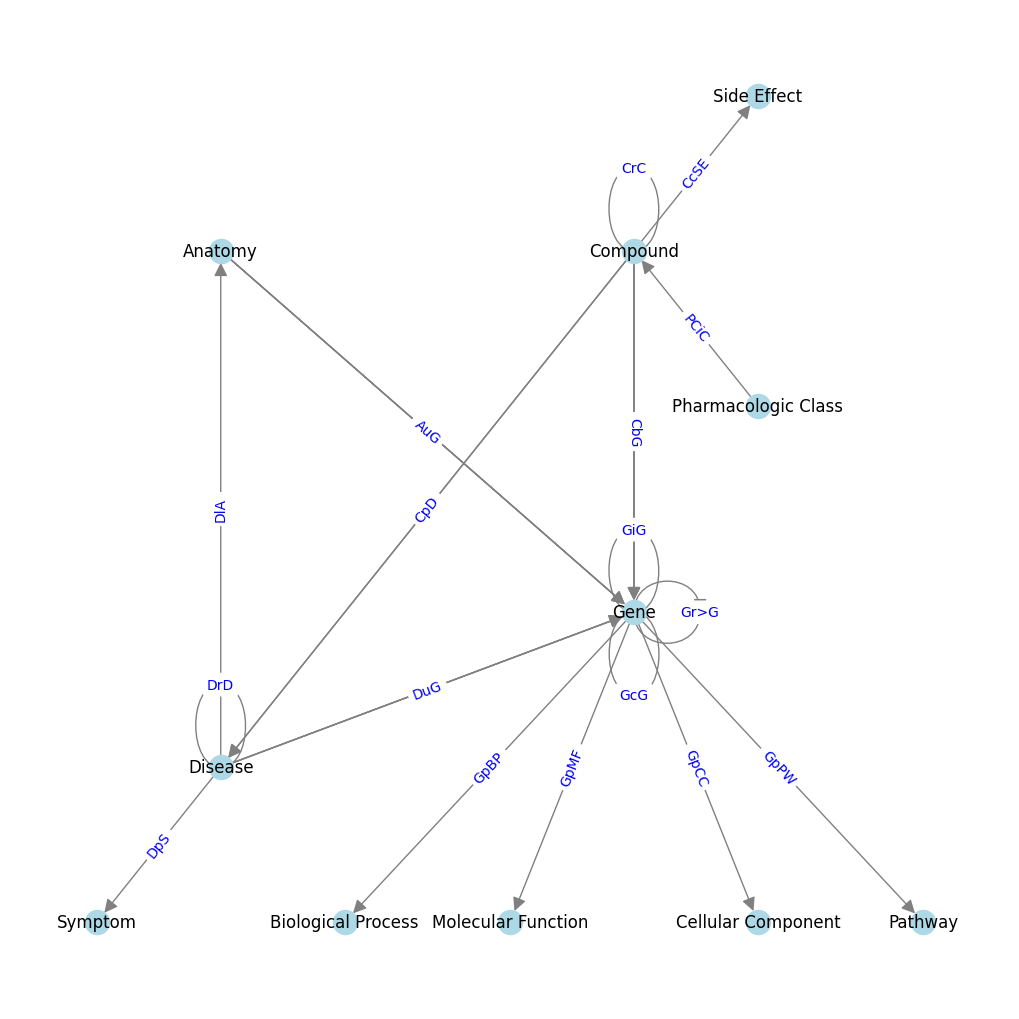

{'Gene': [0.5, -0.2], 'Biological Process': [-0.2, -0.8], 'Compound': [0.5, 0.5], 'Anatomy': [-0.5, 0.5], 'Disease': [-0.5, -0.5], 'Molecular Function': [0.2, -0.8], 'Pathway': [1.2, -0.8], 'Cellular Component': [0.8, -0.8], 'Pharmacologic Class': [0.8, 0.2], 'Side Effect': [0.8, 0.8], 'Symptom': [-0.8, -0.8]}


In [91]:
# [Code: 10]

# Building the graph representing all the possible types of connections among the different node kinds
connectionTypeDF = edgesTypeDF[['metaedge','kind_source','kind_target']].drop_duplicates()
recapConnectionsG =  nx.from_pandas_edgelist(connectionTypeDF, 'kind_source', 'kind_target', edge_attr='metaedge', create_using=nx.MultiDiGraph())

# Drawing the graph with nodes and edges
if generateImages:
  plt.figure(figsize=(10, 10))
  pos = nx.circular_layout(recapConnectionsG) #positions for all nodes
  pos = {'Gene':[0.5,-0.2],'Biological Process':[-0.2,-0.8],'Compound':[0.5,0.5],'Anatomy':[-0.5,0.5],'Disease':[-0.5,-0.5],'Molecular Function':[0.2,-0.8],'Pathway':[1.2,-0.8], 'Cellular Component':[0.8,-0.8], 'Pharmacologic Class':[0.8,0.2], 'Side Effect':[ 0.8, 0.8], 'Symptom':[ -0.8, -0.8]}
  nx.draw(recapConnectionsG, pos, with_labels=True, node_color='lightblue', edge_color='gray',arrowstyle='-|>', arrowsize=20)
  edge_labels = nx.draw_networkx_edge_labels(recapConnectionsG, pos, edge_labels=nx.get_edge_attributes(recapConnectionsG, 'metaedge') ,  font_color='blue')  #adding edge labels
  if overwriteSavings:
    plt.savefig('Outputs/Graph_structure.png', dpi=300, bbox_inches='tight')
  plt.show()

  print(pos)

 # pos = {'Gene': [0.5,-0.5], 'Biological Process':[ 0.55905512, -0.35433071], 'Compound':[0.5, 0.5], 'Anatomy':[ -0.5, 0.5], 'Disease':[ -0.5, -0.5], 'Molecular Function': array([-0.22047244,  0.42519685]), 'Pathway': array([-0.13385827,  0.33858268]), 'Cellular Component': array([-0.04724409,  0.2519685 ]), 'Pharmacologic Class': array([0.03937008, 0.07874016]), 'Side Effect': array([ 0.12598425, -0.00787402]), 'Symptom': array([ 0.12598425, -0.09448819])}

In [37]:
# [Code: 11]

# Individuation of the main symptom
symptoms = [input("How can I help you today? Which is your main symptom?")] # Main symptom example: Symptom::D058447 (Eye Pain)
possibleDiseases = set(G.predecessors(symptoms[0]))

# Searching for the disease
if len(possibleDiseases) > 1:
  possibleSymptoms = list({possibleSymptom for possibleDisease in possibleDiseases for possibleSymptom in G.neighbors(possibleDisease) if possibleSymptom[:7]=='Symptom'} - set(symptoms))
  possibleSymptomsSimilarity = sorted([(possibleSymptom, mdgJaccard(G, possibleSymptom, symptoms[0])) for possibleSymptom in possibleSymptoms], key = lambda x: x[1])
  i = 0
if input("Do you already recognize specific other symptoms?   [Y/N]").lower() == 'y': # Asking for eventually already recognized secondary symptoms, which could be correlated to the main one and reveal the actual disease
  secondarySymptoms = [x.strip() for x in input("Please specify all already recognized secondary symptoms ordered by relevance and separated my ',' characters:").split(sep=',')]
  irrelevantSymptoms = []
  unrecognizedSymptoms = []
  for secondarySymptom in secondarySymptoms:
    if G.has_node(secondarySymptom):
      if mdgJaccard(G, secondarySymptom, symptoms[0]) != 0:
        symptoms += [secondarySymptom]
        possibleDiseases = possibleDiseases & set(G.predecessors(secondarySymptom))
      else:
        irrelevantSymptoms += [secondarySymptom]
    else:
      unrecognizedSymptoms += [secondarySymptom]
  if len(irrelevantSymptoms) > 0:
    print("The following symptoms seem to be irrelevant with respect to the main one:", irrelevantSymptoms)
  if len(unrecognizedSymptoms) > 0:
    print("The following inputs are not recognizable as diseases:", unrecognizedSymptoms)
while i < 5 and len(possibleDiseases) > 1:  # Asking for eventually recognizable secondary symptoms among the ones proposed by similarity basis, which could reveal the actual disease
  otherSymptomPresence = input("Do you maybe feel this symptom too?   " + possibleSymptomsSimilarity[i][0] + "   [Y/N]")
  if otherSymptomPresence.lower() == 'y':
    symptoms = symptoms + [possibleSymptomsSimilarity[i][0]]
    possibleDiseases = possibleDiseases & set(G.predecessors(possibleSymptomsSimilarity[i][0]))
  i += 1

# Results output
print("The relevant symptoms are:", symptoms)
if len(possibleDiseases) == 1:
  disease = list(possibleDiseases)[0]
  print("You may have this disease:", disease)
  print("Therefore, you may also recognize the following symptoms:", {symptom for symptom in G.neighbors(disease) if symptom[:7]=='Symptom'} - set(symptoms))

  compoundForDisease = [node for node in G.predecessors(disease) if node[:8] == 'Compound']
  print("Compounds that may treat the disease:", compoundForDisease)

  count = {compound:len([node for node in G.neighbors(compound) if node[:11] == 'Side Effect']) for compound in compoundForDisease}
  print(count)

  minSideEffect = min(count, key=count.get)
  print("The compound with the lower number of side effects is:", minSideEffect)

else:
  print("Thus your disease may be one of the following:", possibleDiseases)

KeyboardInterrupt: Interrupted by user